In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline
# replace rows: data['HOMEOWNR'] = list(map(lambda x: replace' ', NaN))
#customer_df.columns = list(map(lambda x: x.lower().replace(" ",""), customer_df.colums)) #change in rows

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data2 = data.copy()
data2.columns = [c.lower().replace(' ', '_') for c in data.columns]
data2 = data2.drop_duplicates()
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data2['effective_to_date']=pd.to_datetime(data2['effective_to_date'])   # datetime
data2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
numerical = data2.select_dtypes(include=np.number).replace(np.nan, 0).fillna(0) #continues
categorical = data2.select_dtypes(include=np.object).replace(np.nan, 'no_value').drop(['customer'], axis=1) #discrete

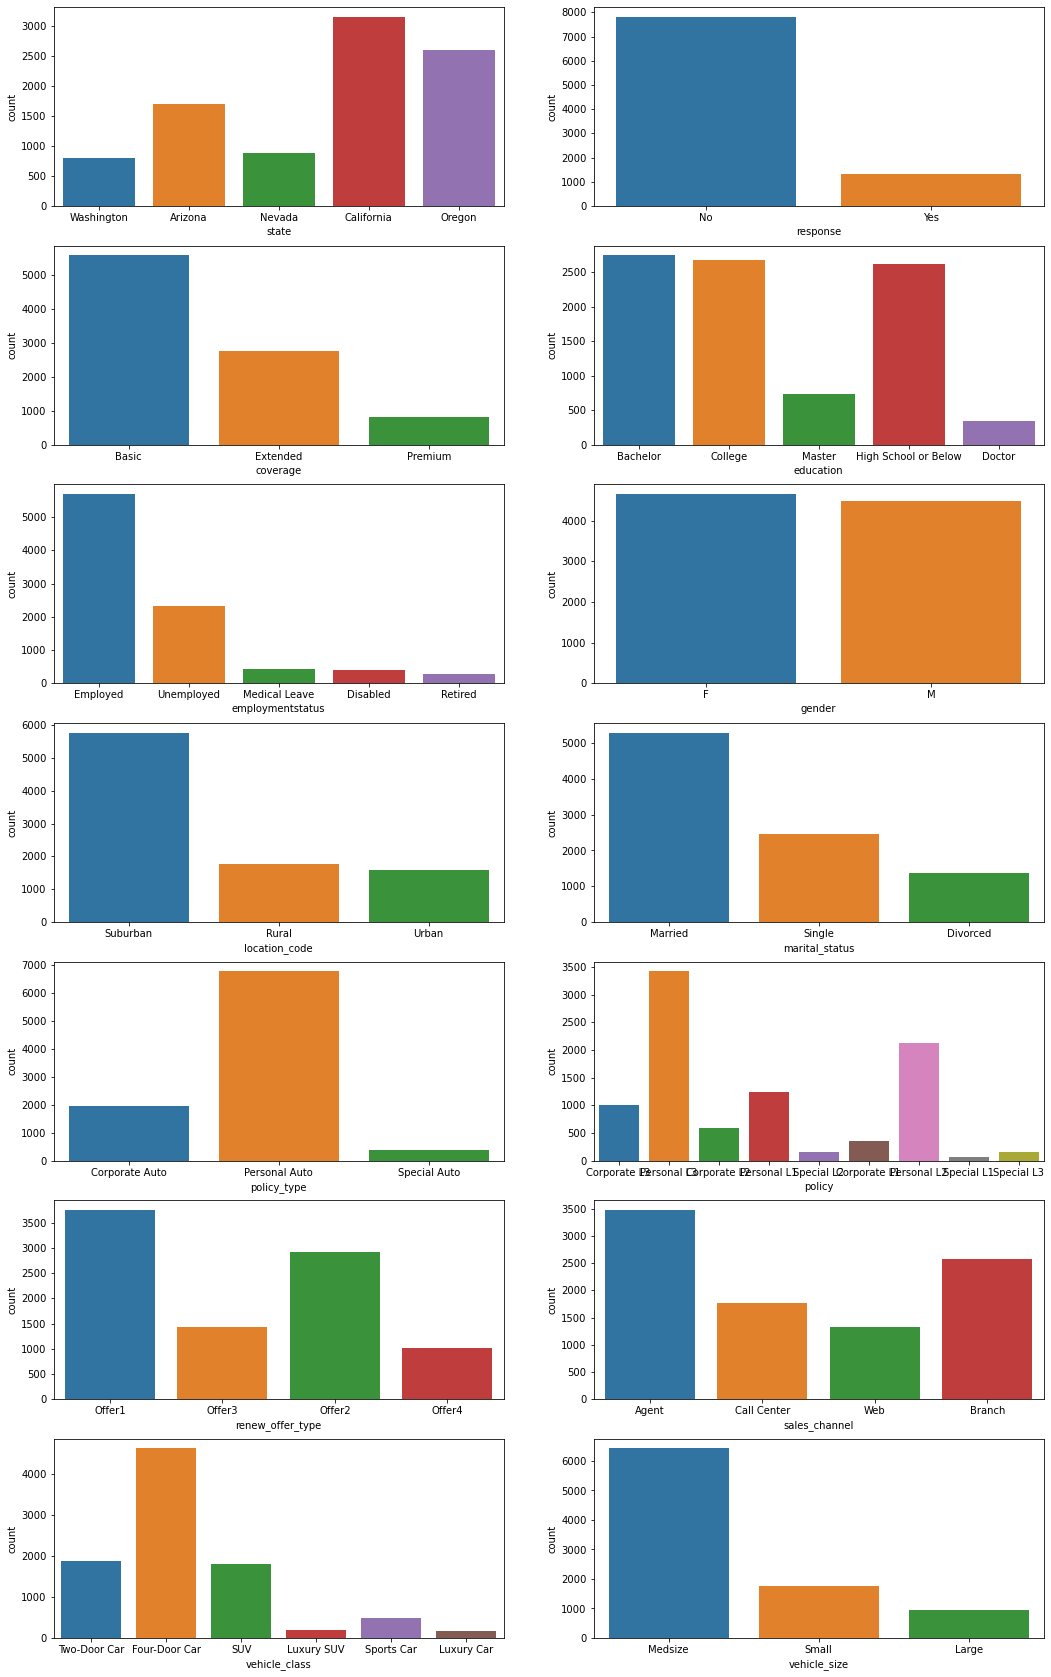

In [6]:
data_cats_cols = categorical.columns
fig,axs = plt.subplots(ncols=7, nrows=2, figsize =(10, 30))
plt.subplots_adjust(right=1.5)
for i, feature in enumerate(data_cats_cols, 1):
    plt.subplot(7, 2, i)
    sns.countplot(x = feature, data= categorical)
plt.show()

In [ ]:
f, axes = plt.subplots(int(categorical.shape[1]/2),2,figsize=(18,50)) #categorical barplot on quantity
for i, col in enumerate(categorical):
    sns.barplot(x=categorical[col].value_counts().index,
               y = categorical[col].value_counts(),
               ax = axes[int(i/2)][int(i)%2])

In [7]:
categorical_y = categorical.copy()
categorical_y['customer_lifetime_value'] = data2['customer_lifetime_value']
categorical_y.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2763.519279
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,6979.535903
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,12887.431650
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,7645.861827
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2813.692575


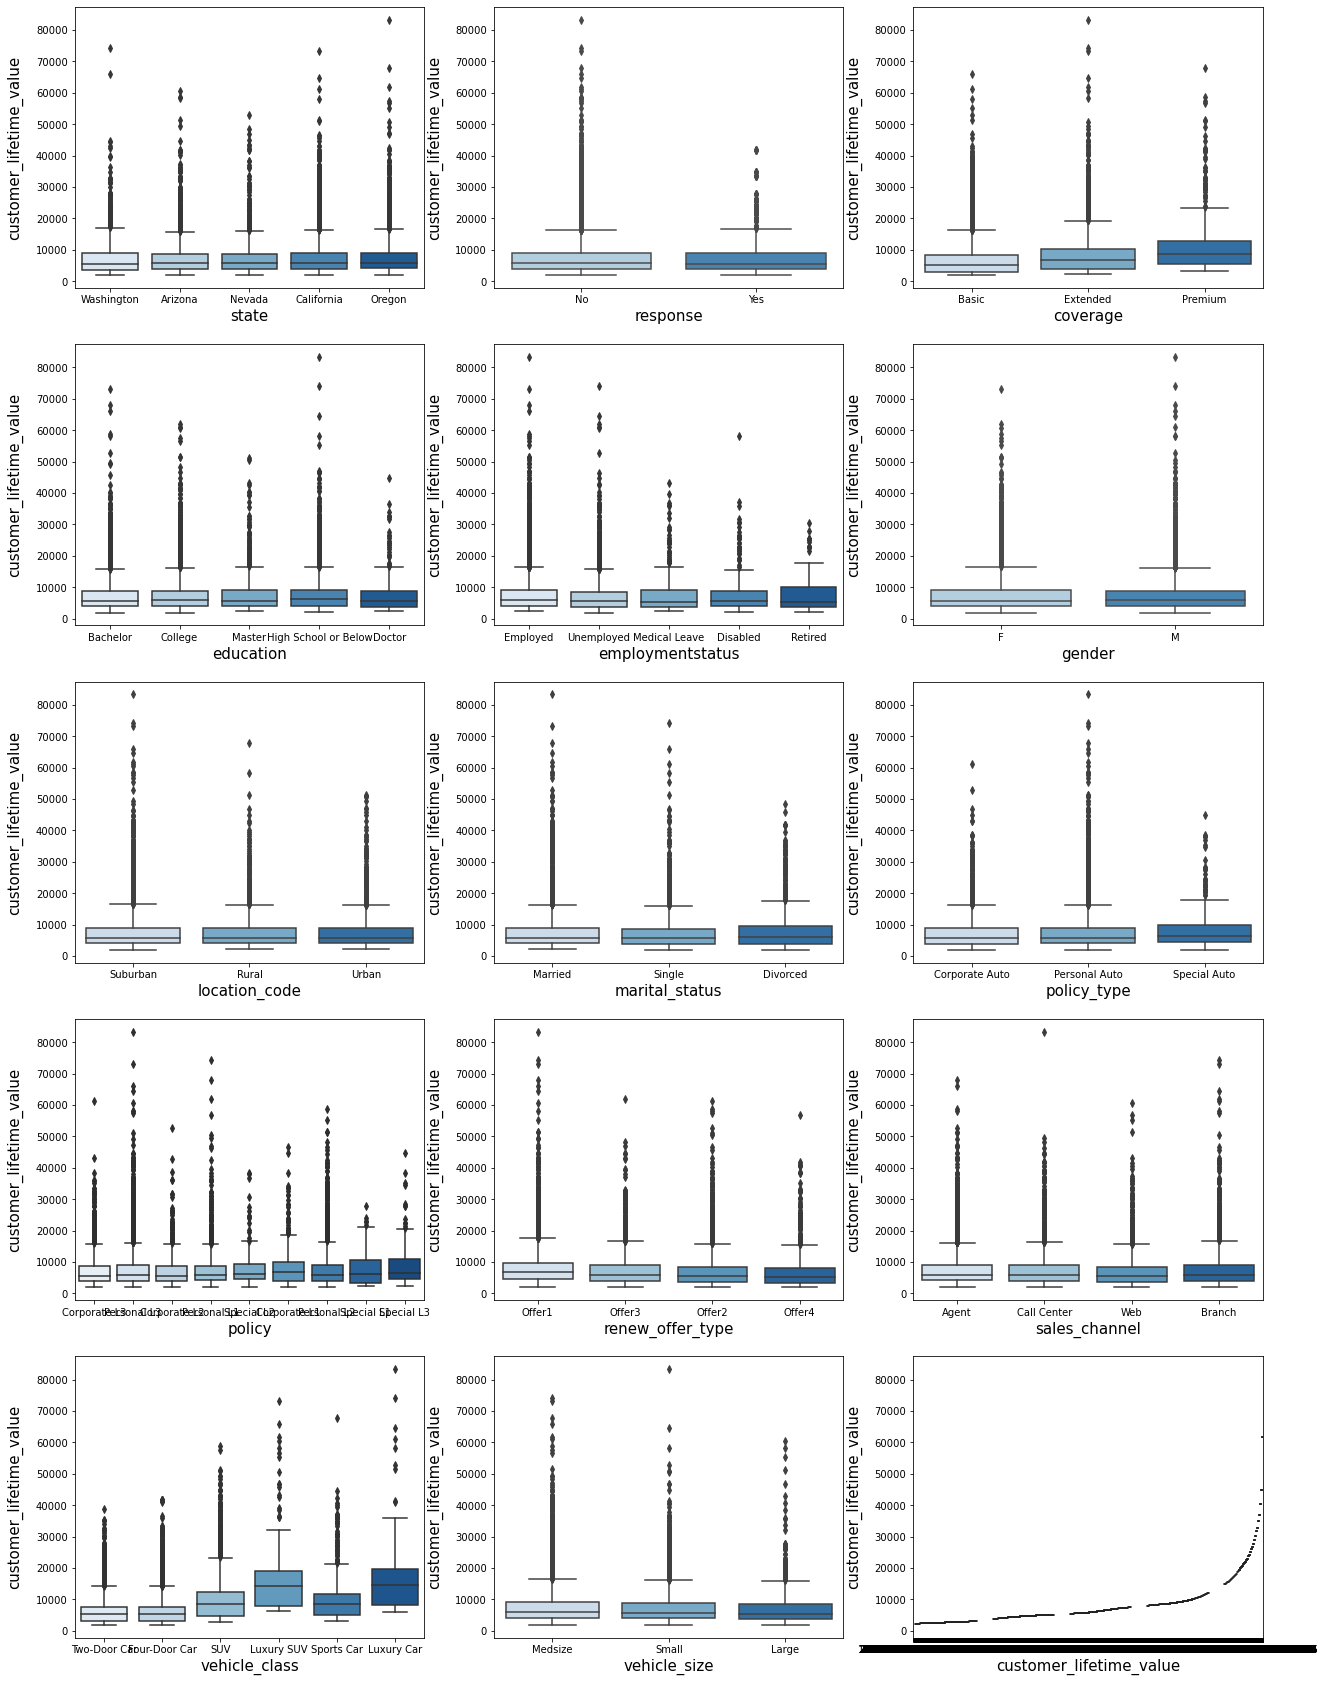

In [8]:
categorical_y_cols = categorical_y.columns
fig,axs = plt.subplots(ncols=3, nrows=5, figsize =(12, 30))
plt.subplots_adjust(right=1.5)
for i, feature in enumerate(categorical_y_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=feature, y='customer_lifetime_value',palette='Blues', data=categorical_y)
    plt.xlabel('{}'.format(feature), size=15)
    plt.ylabel('customer_lifetime_value', size=15, labelpad=12.5)
plt.show()

In [10]:
probplot(data['customer_lifetime_value'], plot=ax2)

NameError: name 'probplot' is not defined

In [ ]:
response, vehicle_size	

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = {}
high_corr = add_constant(high_corr)

for i in np.arange(high_corr.shape[1]):
    column_name = high_corr.columns[i]
    value = variance_inflation_factor(np.array(high_corr), i)
    vif[column_name] = value
    
    # Code to use the variance_inflation_factor technique to remove highly correlated columns
high_corr = data[['HV1','HV2','HV3','HV4']]
flag = True
threshold = 10
high_corr = add_constant(high_corr)
while flag is True:
    print(high_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(high_corr), i) for i in np.arange(high_corr.shape[1])]
    print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = high_corr.columns[col_index]
        high_corr = high_corr.drop([column_name], axis=1)
        flag = True